# Basic plotting with pandas and Matplotlib

As we're now familiar with some of the features of [pandas](https://pandas.pydata.org/), we will wade into visualizing our data in Python using the built-in plotting options available directly in pandas. Much like the case of pandas being built upon [NumPy](https://numpy.org/), plotting in pandas takes advantage of plotting features from the [Matplotlib](https://matplotlib.org/) plotting library. Plotting in pandas provides a basic framework for visualizing our data, but as you'll see we will sometimes need to also use features from Matplotlib to enhance our plots. In particular, we will use features from the the `pyplot` module in Matplotlib, which provides [MATLAB](https://www.mathworks.com/products/matlab.html)-like plotting.


---

##General information
**Sources**

This lesson is inspired by the Geo-python module at the University of Helsinki which in turn acknowledges the Programming in Python lessons from the Software Carpentry organization. This version was adapted for Colab and a UK context by Ruth Hamilton.

**About this document**

This is a Google Colab Notebook. This particular notebook is designed to introduce you to a few of the basic concepts of programming in Python. Like other common notebook formats (e.g. Jupyter), the contents of this document are divided into cells, which can contain:

Markdown-formatted text,
Python code, or
raw text
You can execute a snippet of code in a cell by pressing Shift-Enter or by pressing the Run Cell button that appears when your cursor is on the cell .

---




## Input data

In the lesson this week we are using the data that we created last week at the end of Lesson 6. This shows monthly average temperature since 1882 recorded in Sheffield, sourced from the [CEDA archives](https://data.ceda.ac.uk/badc/ukmo-midas-open/data/uk-daily-temperature-obs/dataset-version-202207/south-yorkshire/00525_sheffield/qc-version-1.) data. We recorded the *average* minimum and maximum monthly temperatures and also the average *mid* temperature, caulcated as the average midpoint over a 24 hour period.

Last week, we only looked at data from the years 1920, 1930, 1940...2020. FOr this class, I have prepared a dataset of every year since 1882. I used *exactly** the same code as we used last week. If you want to see how I sourced and compiled the data for this class, please look at the notebook \<insert notebook link here\>

\*almost *exactly*, I did make some very small cosmetic modifications to the code


## Getting started

Let's start by mounting our Google drive and importing Pandas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

><b>Datetime in Python</b><br/>
>
>For the lesson this week we will be using a datetime index for our weather observations.
We did not cover the datetime data type in detail in Lesson 6, but you can find further guidance on how to use pandas datetime functionality in the official documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and in the [pandas User Guide.](https://pandas.pydata.org/docs/user_guide/timeseries.html)

Just as we did last week, we'll read our data file by passing a few parameters to the Pandas `read_csv()` function. Then we'll check that it's read in correctly with the `.head()` method.

In [2]:
# Define absolute path to the file
fp = r'/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/L7/sy_summary_data.csv'

In [5]:
data = pd.read_csv(fp, usecols=['MAX','MIN','MID','YEAR_MONTH'])
#data = pd.read_csv(fp, usecols=['MAX','MIN','MID','YEAR_MONTH'],parse_dates=['YEAR_MONTH'])

In [ ]:
#use the .head() method to check that the data has read in correctly
data.head()

,YEAR_MONTH,MIN,MAX,MID
0,1882_12,0.467742,4.720000,2.640000
1,1883_01,1.738710,6.254839,3.996774
2,1883_02,2.817857,7.785714,5.301786
3,1883_03,-1.606452,4.767742,1.580645
4,1883_04,3.840000,12.206667,8.023333


In [6]:
#use the .dtypes attribute to check that the data types
data.dtypes

YEAR_MONTH     object
MIN           float64
MAX           float64
MID           float64
dtype: object

It would be useful to use the *date* information as the index for our dataset. In order to do this, first we need to convert the information in the `'YEAR_MONTH'` column into a pandas `datetime` type. Then we can *set* it as the index using the `set_index()` method.

We are going to use the `pd.to_datetime()` method we used last week, to convert the *string* object in the `'YEAR_MONTH'` column to a `datetime` object. Becasue our date information is not in a standard date format, we need to specify the `format` paramter, in this case we are going to tell pandas that our date is in the format `year-month` using the syntax `format='%Y-%m'`.

In [ ]:
#creates a new column, DATE, and converts the YEAR_MONTH value to a datetime obejct
data['DATE'] = pd.to_datetime(data['YEAR_MONTH'], format='%Y_%m')
print(data.dtypes)
print(data.head())

YEAR_MONTH            object
MIN                  float64
MAX                  float64
MID                  float64
DATE          datetime64[ns]
dtype: object
  YEAR_MONTH       MIN        MAX       MID       DATE
0    1882_12  0.467742   4.720000  2.640000 1882-12-01
1    1883_01  1.738710   6.254839  3.996774 1883-01-01
2    1883_02  2.817857   7.785714  5.301786 1883-02-01
3    1883_03 -1.606452   4.767742  1.580645 1883-03-01
4    1883_04  3.840000  12.206667  8.023333 1883-04-01


From the `data.dtypes` output, we can see that we have a `'DATE'` column with  `datetime64[ns]` type. We can also see that the dates in this column are presented as `year-month-day` (this is the default date format in pandas), in this case, becasue we had no day information, it has assumed the first day of the month.  

Next, we are going use the `set_index()` method to specify that we want to use the `'DATE'` information as the index. We will use the additional paramters `drop=False` (this keeps a `'DATE'` column in the dataframe) and `inplace=True` (becasue we want to modify the dataframe we are working with).

In [ ]:
#set the index of our data to use the new DATE column
data.set_index(data['DATE'],inplace=True)


In [ ]:
data.head()

,YEAR_MONTH,MIN,MAX,MID,DATE
DATE,,,,,
1882-12-01,1882_12,0.467742,4.720000,2.640000,1882-12-01
1883-01-01,1883_01,1.738710,6.254839,3.996774,1883-01-01
1883-02-01,1883_02,2.817857,7.785714,5.301786,1883-02-01
1883-03-01,1883_03,-1.606452,4.767742,1.580645,1883-03-01
1883-04-01,1883_04,3.840000,12.206667,8.023333,1883-04-01


In [ ]:
data.dtypes
data.index

DatetimeIndex(['1882-12-01', '1883-01-01', '1883-02-01', '1883-03-01',
               '1883-04-01', '1883-05-01', '1883-06-01', '1883-07-01',
               '1883-08-01', '1883-09-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='DATE', length=1647, freq=None)

As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame.

## Basic x-y plot

Now we're ready for our first plot. We can start by using the basic line plot in Pandas to look at our temperature data.

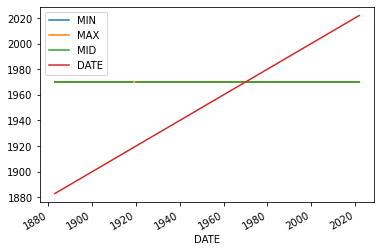

In [ ]:
ax = data.plot()

If all goes well, you should see the plot above.

OK, so what happened here?

1. We first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis.
2.It *doesn't* show the `YEAR_MONTH` column becasue this is `object` (string) data but it is plotting the `DATE` column - which is not very useful.
3. Because we assigned the plot object to the variable `ax`, it is easy to modify or add elements. We can also check its type.

In fact, let's check the type of the `ax` variable now.

In [ ]:
type(ax)

matplotlib.axes._axes.Axes

OK, so it looks like we have some kind of plot data type that is part of Matplotlib. Clearly, pandas is using Matplotlib for generating our plots.

### Selecting our plotted data

Now, let's make a few small changes to our plot and plot the data again. First, let's only plot the columns with temperatures, i.e `'MIN'`, `'MAX'` and `'MID'` columns. We can do this by selecting the desired data columns as a list.

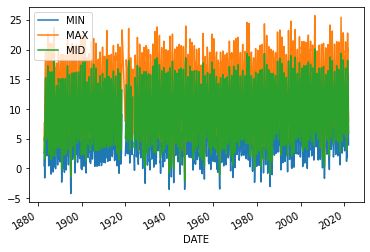

In [ ]:
ax = data[["MIN","MAX","MID"]].plot()

This plot is showing the mean monthly minimum, maximum and midpoint temperatures for each month. It looks a little strange around the 1920 period, so lets see if we can have a closer look at the years between 1915 and 1920.

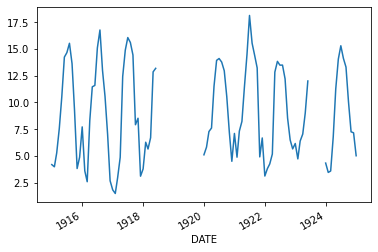

In [ ]:
old_temps = data["MID"].loc[(data.index >= "1915") & (data.index <= "1925")  ]
ax = old_temps.plot()

So, what did we change?

1. Well, we selected only the `'MID'` column now by using `data['MID']` instead of `data`.
2. We've added a restriction to the date range using `loc[]` to select only rows where the index value in `data.index` is greater than '1915' *and* less than 1925. Now we have all observations from January 1915 onwards.
3. By saving this selection to the DataFrame `old_temps` we're able to now use `old_temps.plot()` to plot only our selection.

We can see from the plot that there are some gaps in the data. Now let's see if these are replicated across all three of our variables.
>**Note** that if we want to select the data from more than one column, we need to enclose the column names in double square brackets `data[["MIN","MID","MAX"]]`.

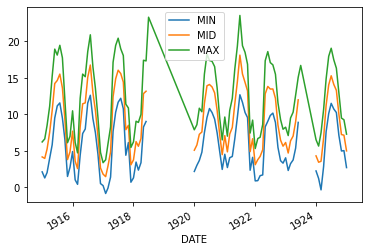

In [ ]:
#plot the min, max and mid monthly mean temperatures between 1915 and 1925
old_all_temps = data[["MIN","MID","MAX"]].loc[(data.index >= "1915") & (data.index <= "1925")  ]
ax = old_all_temps.plot()

In [ ]:
old_all_temps


,MIN,MID,MAX
DATE,,,
1915-01-01,2.132258,4.180645,6.229032
1915-02-01,1.303571,3.975000,6.646429
1915-03-01,2.041935,5.270968,8.500000
1915-04-01,4.000000,7.556667,11.113333
1915-05-01,5.829032,10.512903,15.196774
...,...,...,...
1924-09-01,10.256667,13.291667,16.326667
1924-10-01,7.145161,10.051613,12.958065
1924-11-01,4.993103,7.244828,9.496552


## Basic plot formatting

We can make our plot look a bit nicer and provide more information by using a few additional plotting options to pandas/Matplotlib.

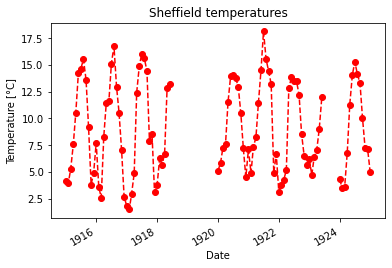

In [ ]:
# Change line and symbol format, and add axis labels/title
# Change line and symbol format, and add axis labels/title
ax = old_temps.plot(
    style="ro--",
    title="Sheffield temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
)

Now we see our temperature data as a red dashed line with circles showing the data points.
This comes from the additional `style='ro--'` used with `old_temps.plot()`.
In this case, `r` tells the `old_temps.plot()` function to use red color for the lines and symbols, `o` tells it to show circles at the points, and `--` says to use a dashed line.
You can use `help(old_temps.plot)` to find out more about formatting plots or have a look at the [documentation on the pandas website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line).
We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters.

In [ ]:
# Commented out here to suppress output for course website
#help(old_temps.plot)




### Changing the plot size

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger.
Fortunately, there is an easy way to make the plots larger in pandas/Matplotlib.
We can simply add the `figsize` parameter with the desired figure size listed as a tuple (a set of values in normal parentheses) that lists the width and height of the figure (in inches!).

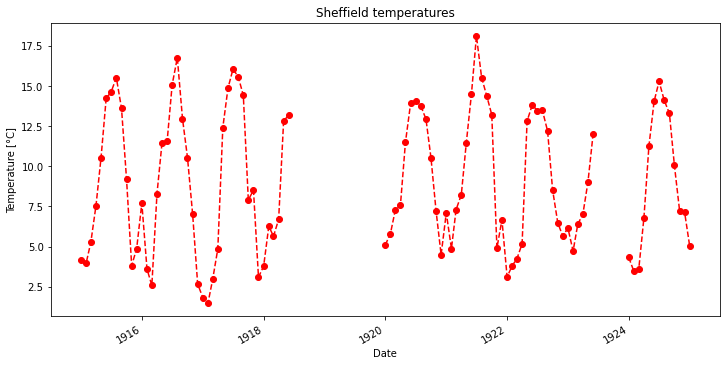

In [ ]:
# Adjust the figure size
ax = old_temps.plot(
    style="ro--",
    title="Sheffield temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
   figsize=(12, 6)

)

The cell above sets the default plot size to be 12 inches wide by 6 inches tall.
Feel free to change these values if you prefer.

><div class="alert alert-info"><b>Note</b><br/>
>    
> You can set the default figure size for all figures in a python Notebook (including Colab) by importing the pyplot module from matplotlib (i.e., `import matplotlib.pyplot as plt`)and then defining the default figure size using `plt.rcParams['figure.figsize'] = [12, 6]`. In this case the figure size should be given as a Python list.
</div>


In [ ]:
#imports the pyplot module from matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
#sets the default figure size far all plots created *after* it is set (it won't resize existing plots unless you re-execute the code)
plt.rcParams['figure.figsize'] = [12, 6]

---

### Other common plot formatting operations

#### Adding text to the plot

>Adding text to plots can be done using `ax.text()`.
>
>```python
>ax.text(x, y, 'Text to display')
```
>
>This would display "Text to display" at the location *x*, *y* on the plot.
We'll see how to do this in a live example in just a second.

#### Changing the axis ranges

>Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function
>
>```python
>df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
>```
>
>where `xmin` should be the minimum bound of the x-axis, `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`.

---

#### Dealing with datetime axes

One issue we will encounter with  changing the axis ranges or placing annotations on the plot, is our datetime index for our DataFrame. Because our x-axis uses *datetime* data, we need to specify x-values using a datetime object. The easiest way to do this is to use the Pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert 1st October  2019 from the character string `'2019_10_01'` to a datetime equivalent by typing `print (pd.to_datetime("2019_10_01", format='%Y_%m_%d'))`.

In [ ]:
#pd.to_datetime("2019_10")
#print (pd.to_datetime("2019_10_01", format='%Y_%m_%d'))
print (pd.to_datetime("2019_10_01", format='%Y_%m_%d'))

2019-10-01 00:00:00


With this datetime issue in mind, let's now consider a modified version of the plot above. Reports claim that the ['big freeze' of 1963](https://www.rmets.org/metmatters/big-freeze-1963-one-coldest-winters-record) was one of the coldest on record. Let's see if we can see eivdence of that in Sheffield. To do this, we want to focus on a specific part of the data and we are going to:

1. Limit our date range to June 1960 to June 1965
2. Only look at temperatures between -5 and 10° Celsius
3. Add text to note the period of coldest temperatures.

Text(1963-02-01 00:00:00, -4.0, 'Coldest monthly average temperature was -3.47 in 02/1963')

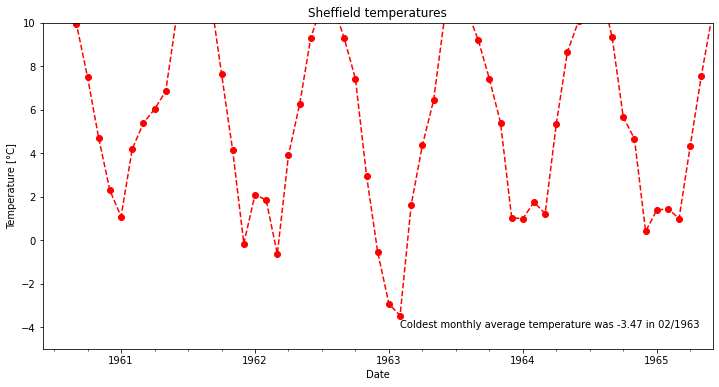

In [ ]:
#@title Default title text
# Define the start, end, and cold times - this allows us to limit our axes
start_time = pd.to_datetime("1960_06", format='%Y_%m')
end_time = pd.to_datetime("1965_06", format='%Y_%m')
cold_time = pd.to_datetime("1963_01", format='%Y_%m')

#select a subset of our orignial data
temp_data=data[["MIN","MID","MAX"]].loc[(data.index >= start_time) & (data.index <= end_time)  ]
#temp_data = data[["MIN","MAX","MID"]]

# Create the plot, including the axis limits
ax = temp_data["MIN"].plot(
    style="ro--",
    title="Sheffield temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[-5.0, 10.0],
)

# Add text to display the coldest temperature
#ax.text(cold_time, -4.25, "Coldest monthly average temperature")
#findest coldest temperature in data
coldest_temp=temp_data["MIN"].min()

#finds index of coldest temperature in data
my_index=temp_data.index[temp_data["MIN"]==coldest_temp].tolist()

ax.text(my_index[0], coldest_temp.round()-1, f"Coldest monthly average temperature was {coldest_temp.round(2)} in 0{my_index[0].month}/{my_index[0].year}")


In [ ]:
my_index=temp_data.index[temp_data["MIN"]==coldest_temp]
my_index.dtype

dtype('<M8[ns]')

This clearly shows that the winter months of 1963 were indeed colder than average.

To make this plot, we have:
* limited the y axis using the `ylim[]` parameter and some integer values.
* limited the x axis using the `xlim[]` parameter and the datetime values we defined for the *start* and *end* times.
* added some annotation text at the location with `(x,y)` coordinates `(cold_time , -4.25)`

### Check your understanding

Create a line plot similar to our examples above with the following attributes:
    
- Maximum average temperature data from 2000 to 2020
- A dotted black line connecting the observations (do not show the data points)
- A title that reads "Average maximum monthly temperature, Sheffield"
- A text label indicating the warmest temperature monthly temperature

In [ ]:
# Define the start, end, and 'warm' times


#select a subset of our orignial data


# Create the plot, including the axis limits

# Add text to display the warmest temperature


In [ ]:
#@title Click here to show code
# Define the start, end, and 'warm' times
start_time = pd.to_datetime("2000_01", format='%Y_%m')
end_time = pd.to_datetime("2020_12", format='%Y_%m')
warm_time = pd.to_datetime("2006_07", format='%Y_%m')

#select a subset of our orignial data
temp_data = data[["MIN","MAX","MID"]]

# Create the plot, including the axis limits
ax = temp_data["MAX"].plot(
    style="k--",
    title="Sheffield temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[-5.0, 30.0],
)

# Add text to display the coldest temperature
ax.text(warm_time, temp_data["MAX"].max().round(), "Warmest monthly average temperature")


## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas. Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter. Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

In [ ]:
# Define time range
start_time = pd.to_datetime("1960_06", format='%Y_%m')
end_time = pd.to_datetime("1965_06", format='%Y_%m')
#cold_time = pd.to_datetime("1963_01", format='%Y_%m')

big_freeze = temp_data["MID"].loc[(temp_data.index >= start_time) & (temp_data.index <= end_time)]

# Create bar plot
ax = big_freeze.plot(kind='bar', title='Sheffield temperatures',
                         xlabel='Date', ylabel='Temperature [°C]',
                         figsize=(12,6),
                         )

# Add plot text
ax.text(31, 5, 'Big \nfreeze \n | \nv')

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using pandas can be done in several ways. The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function. When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell. The file name is required, and the image format will be determined based on the listed file extension. Note that because we have not used Matplotlib for any of the earlier plots, we need to import it here first.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS. PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics. Let's check out an example and save our lovely bar plot.

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create bar plot
ax = big_freeze.plot(kind='bar', title='Sheffield temperatures',
                         xlabel='Date', ylabel='Temperature [°C]',
                         figsize=(12,6),
                         )

# Add plot text
ax.text(31, 5, 'Big \nfreeze \n | \nv')

# Save plot to file
plt.savefig("bar-plot.pdf")

If you refresh your **Files** tab on the left side of the Colab window, you should now see `bar-plot.png` listed. By default, it will save in your 'content' drive. To download it it so that you can open it, click on the three dots and select download.


You may notice that some of the aiz labels are cut-off, we can fix that by including the parameter `bbox_inches='tight'`.
We can also save it with a higher resolution using the `dpi` paramter..

In [ ]:
# Create bar plot
ax = big_freeze.plot(kind='bar', title='Sheffield temperatures',
                         xlabel='Date', ylabel='Temperature [°C]',
                         figsize=(12,6),
                         )

# Add plot text
ax.text(31, 5, 'Big \nfreeze \n | \nv')



# Save plot to file (high resolution, PDF)
plt.savefig("bar-plot-hi-res.pdf", dpi=600,bbox_inches='tight')